Authors: Leonardo Santana and Akshay Suresh

### Examining Crop-yield Correlations

In this notebook, we will explore correlation coefficiencts of the state-wise annual rice yield with other variables in our database. In particular, we will focus on the Pearson and Spearman correlation coefficents. The following link elucidates the differences between these correlation coefficients. <br>
https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8

In [1]:
# Load packages.
from scipy.stats import pearsonr, spearmanr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
# Load .csv file.
df = pd.read_csv('../Final_data/rice_yield.csv')

In [3]:
# View columns in df.
list(df.columns)

['Dist Code',
 'Year',
 'Dist Name',
 'State Name',
 'RICE AREA (1000 ha)',
 'RICE YIELD (kg per ha)',
 'nitrogen',
 'phosphate',
 'potash',
 'prec_grow',
 'prec_harvest',
 'et_grow',
 'et_harvest',
 'maxT_grow',
 'maxT_harvest',
 'minT_grow',
 'minT_harvest',
 'runoff_grow',
 'runoff_harvest',
 'windspeed_grow',
 'windspeed_harvest',
 'RICE IRRIGATED AREA (1000 ha)',
 'RA-IA']

`Dist Code`: District code <br>
`Year`: Year <br>
`Dist Name`: District name <br>
`State Name`: State name <br>
`RICE AREA (1000 ha)`: Gross cropped area of rice in units of 1000 hectares <br>
`RICE YIELD (kg per ha)`: Rice yield (kg/ha) <br>
`nitrogen`: tonnes of nitogen fertilizer used <br>
`phosphate`: tonnes of phosphate fertilizer used <br>
`potash`: tonnes of potash fertilizer used <br>
`prec_grow`: Average monthly precipitation (mm) during growing season <br>
`prec_harvest`: Average monthly precipitation (mm) during harvesting season <br>
`et_grow`: Average monthly evapotranspiration (mm) during growing season <br>
`et_harvest`: Average monthly evapotranspiration (mm) during harvesting season <br>
`maxT_grow`: Average of monthly maximum temperatures (celsius) during growing season <br>
`maxT_harvest`: Average of monthly maximum temperatures (celsius) during harvesting season <br>
`minT_grow`: Average of monthly minimum temperatures (celsius) during growing season <br>
`minT_harvest`: Average of monthly minimum temperatures (celsius) during harvesting season <br>
`runoff_grow`: Mean surface runoff (mm) during growing season <br>
`runoff_harvest`: Mean surface runoff (mm) during harvesting season <br>
`windspeed_grow`: Mean wind speed (m/s) during growing season <br>
`windspeed_harvest`: Mean wind speed (m/s) during harvesting season <br>
`RICE IRRIGATED AREA (1000 ha)`: Rice-irrigated area in units of 1000 hectares <br>
`RA-IA`: Difference between cropped area and irrigated area of rice (1000 hecatres) <br>

In [4]:
# Compute fraction of rice area that is irrigated.
df['irr_frac'] = df['RICE IRRIGATED AREA (1000 ha)']/df['RICE AREA (1000 ha)']

# Drop RICE IRRIGATED AREA column.
df.drop('RICE IRRIGATED AREA (1000 ha)', axis=1, inplace=True)

In [5]:
# Correlate quantitites in the following columns with RICE YIELD for every state.
columns_corr = list(df.columns)[6:]

# List of states sorted in alphabetical order
states = list(sorted(np.unique(df['State Name'])))

### Pearson correlation coefficient and p-values

The Pearson correlation coefficient measures a linear relationship between two random variables. For two random variables $X$ and $Y$, their Pearson correlation coefficient is given by
\begin{equation}
\rho = \frac{{\rm Cov}(X,Y)}{\sqrt{{\rm Var}(X) . {\rm Var}(Y)}}.
\end{equation}

**NOTE**: The Pearson correlation coefficient is only applicable to pairs of linearly related variables. If our x-y data are non-linear, the Pearson correlation coefficient informs us of the slope of the best-fit line to our data.

A $p$-value evaluates the statistical significance of our correlation coefficient against a null hypothesis. <br>

Null hypothesis: $\rho = 0$. <br>
Test hypothesis: $|\rho| > 0$. <br>

To measure a $p$-value, we first invoke a probability distribution function, $f(|\rho|)$. By definition,
\begin{equation}
\int_{0}^{1} {\rm d}\rho \ f(|\rho|) = 1.
\end{equation}

Say that our measured correlation coefficient is $\rho_0$. The p-value corresponding to $\rho_0$ is then $\int_{|\rho_0|}^{1} f(|\rho|)$. In other words, the p-value is the probability that our data are consistent with the null-hypothesis. Smaller p-values favor the test hypothesis. Often, one invokes a threshold $p_t$ above which the null hypothesis is taken to be favorable. Here, we set $p_t = 0.05$ and adopt a Student's t-distribution for $f$. 

### Spearman correlation coefficient
The Spearman correlation coefficient is a generalization of $\rho$ that measures a monotonic relationship between two random variables $X$ and $Y$. Again, we derive p-values for our Spearman correlation coefficients following the approach outlined above for $\rho$.

In [6]:
# Hyperparameters
p_t = 0.05 # Threshold probability above which we favor the null hypothesis

In [7]:
# Pearson correlation coefficient matrix
pearson_corrcoeff = np.zeros((len(states), len(columns_corr)))

# p-value matrix for Pearson correlation coefficients
pearson_pvalue = np.zeros((len(states), len(columns_corr)))

In [8]:
# Spearman correlation coefficient matrix
spearman_corrcoeff = np.zeros((len(states), len(columns_corr)))

# p-value matrix for Spearman correlation coefficients
spearman_pvalue = np.zeros((len(states), len(columns_corr)))

In [9]:
# Loop over states.
i = 0
for state in states:
    selection = df.loc[df['State Name']==state]
    # Loop over columns of interest.
    j = 0
    for column in columns_corr:
        pearson_corrcoeff[i,j], pearson_pvalue[i,j] = pearsonr(selection[column], selection['RICE YIELD (kg per ha)'])
        spearman_corrcoeff[i,j], spearman_pvalue[i,j] = spearmanr(selection[column], selection['RICE YIELD (kg per ha)'])
        j+=1
    i+=1

In [10]:
# Mask arrays
# if p_value > p_t, mask = True, else, mask = False
pearson_mask = (pearson_pvalue >= p_t)
spearman_mask = (spearman_pvalue >= p_t)

### Data visualization

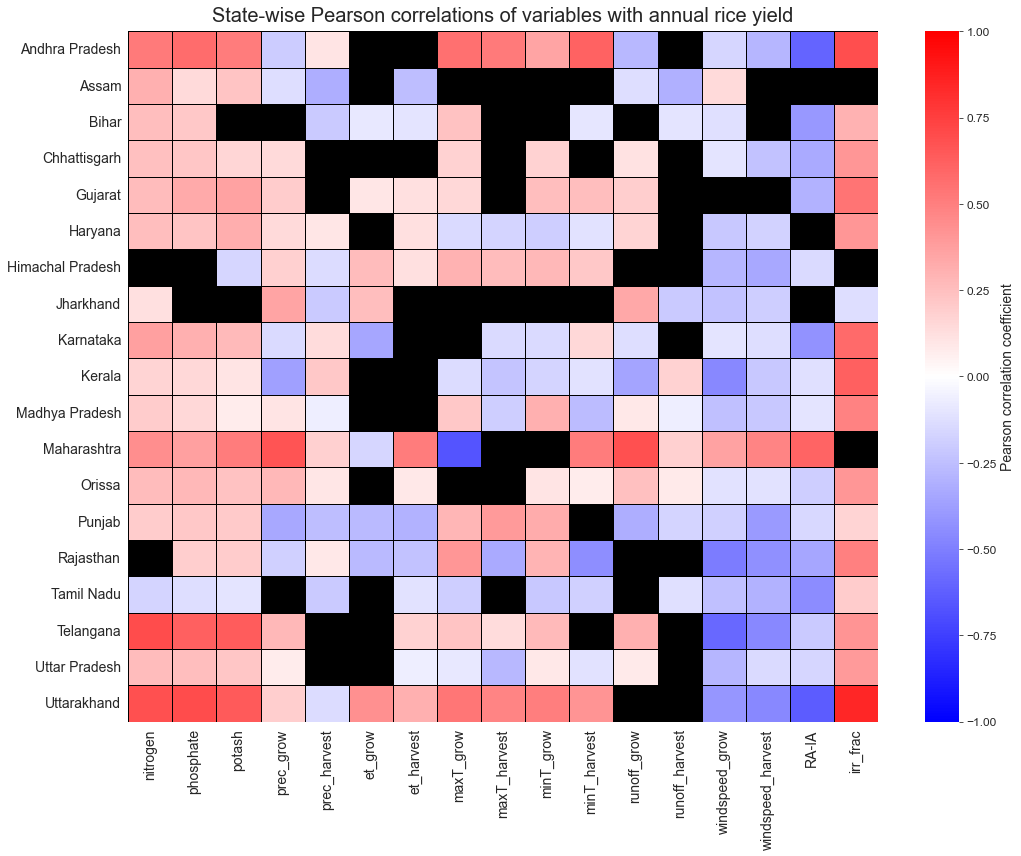

In [11]:
# Plot heatmap of Pearson correlation coefficients with p-value < p_t.

fig = plt.figure(figsize=(15,12))
ax = sns.heatmap(pearson_corrcoeff, mask=pearson_mask, xticklabels=columns_corr, yticklabels=states,
            vmin=-1, vmax=1, center=0, cmap='bwr', linewidth=1, linecolor='k')
# Black cells for masked values
ax.set_facecolor("black")
# Color bar properties
ax.collections[0].colorbar.set_label("Pearson correlation coefficient", fontsize=14)
ax.collections[0].colorbar.ax.tick_params(labelsize=12)
# xticklabels
ax.tick_params(axis='x', labelsize=14)
# yticklabels
ax.tick_params(axis='y', labelsize=14)
# Plot title
plt.title('State-wise Pearson correlations of variables with annual rice yield', fontsize=20, pad=10.0)
plt.tight_layout()
plt.show()

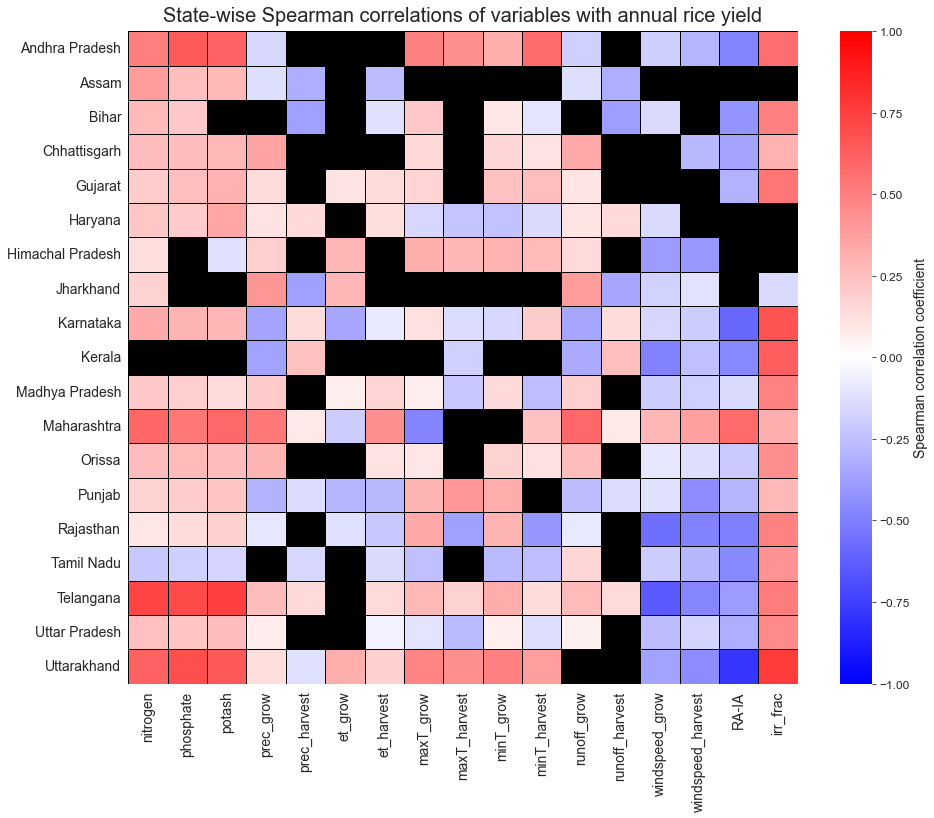

In [12]:
# Plot heatmap of Spearman correlation coefficients with p-value < p_t.

fig = plt.figure(figsize=(15,12))
ax = sns.heatmap(spearman_corrcoeff, mask=spearman_mask, xticklabels=columns_corr, yticklabels=states,
            vmin=-1, vmax=1, center=0, cmap='bwr', linewidth=1, linecolor='k')
# Black cells for masked values
ax.set_facecolor("black")
# Color bar properties
ax.collections[0].colorbar.set_label("Spearman correlation coefficient", fontsize=14)
ax.collections[0].colorbar.ax.tick_params(labelsize=12)
# xticklabels
ax.tick_params(axis='x', labelsize=14)
# yticklabels
ax.tick_params(axis='y', labelsize=14)
# Plot title
plt.title('State-wise Spearman correlations of variables with annual rice yield', fontsize=20, pad=10.0)
plt.show()